In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


In [16]:
#read in the file 'Homicide.csv' and store it in a variable called homicide
homicide = pd.read_csv('Homicide.csv')

In [17]:
#how many rows are in the dataset
homicide.shape

(1015, 13)

In [18]:
#list the names of all the columns in the dataset
homicide.columns

Index(['X', 'Y', 'Index_', 'Event_Unique_ID', 'Occurrence_year', 'Division',
       'Homicide_Type', 'Occurrence_Date', 'Hood_ID', 'Neighbourhood', 'Lat',
       'Long', 'ObjectId'],
      dtype='object')

In [19]:
#replace the default index with the values of the 'Index_' column
homicide.set_index(['Index_'])

X          Y Event_Unique_ID  Occurrence_year Division  \
Index_                                                                   
1      -79.392853  43.685028          111878             2004      D53   
2      -79.234962  43.781536          125755             2004      D42   
3      -79.206894  43.810860          136086             2004      D42   
4      -79.434403  43.670475          148623             2004      D13   
5      -79.203865  43.823543          148619             2004      D42   
...           ...        ...             ...              ...      ...   
1235   -79.374847  43.660656  GO-20182242344             2018      D51   
1236   -79.548676  43.701328  GO-20182280579             2018      D23   
1237   -79.517776  43.759018  GO-20182315055             2018      D31   
1238   -79.397644  43.644955  GO-20182320758             2018      D14   
1240   -79.585831  43.750977  GO-20182339244             2018      D23   

       Homicide_Type           Occurrence_Date  Hood_ID  \
Index_                                                    
1              Other  2004-01-03T05:00:00.000Z       98   
2           Shooting  2004-01-08T05:00:00.000Z      137   
3           Shooting  2004-01-08T05:00:00.000Z      132   
4           Shooting  2004-01-25T05:00:00.000Z       93   
5           Shooting  2004-01-25T05:00:00.000Z      131   
...              ...                       ...      ...   
1235        Stabbing  2018-12-06T05:00:00.000Z       73   
1236        Shooting  2018-12-12T05:00:00.000Z        6   
1237        Shooting  2018-12-18T05:00:00.000Z       24   
1238        Shooting  2018-12-19T05:00:00.000Z       77   
1240        Shooting  2018-12-21T05:00:00.000Z        2   

                                   Neighbourhood        Lat       Long  \
Index_                                                                   
1                       Rosedale-Moore Park (98)  43.685028 -79.392853   
2                                   Woburn (137)  43.781536 -79.234962   
3                                  Malvern (132)  43.810860 -79.206894   
4       Dovercourt-Wallace Emerson-Junction (93)  43.670475 -79.434403   
5                                    Rouge (131)  43.823543 -79.203865   
...                                          ...        ...        ...   
1235                              Moss Park (73)  43.660656 -79.374847   
1236           Kingsview Village-The Westway (6)  43.701328 -79.548676   
1237                            Black Creek (24)  43.759018 -79.517776   
1238      Waterfront Communities-The Island (77)  43.644955 -79.397644   
1240       Mount Olive-Silverstone-Jamestown (2)  43.750977 -79.585831   

        ObjectId  
Index_            
1              1  
2              2  
3              3  
4              4  
5              5  
...          ...  
1235        1011  
1236        1012  
1237        1013  
1238        1014  
1240        1015  

[1015 rows x 12 columns]

In [20]:
#list the types of homicides in the order of their frequency
homicide['Homicide_Type'].value_counts()

Shooting    526
Other       263
Stabbing    226
Name: Homicide_Type, dtype: int64

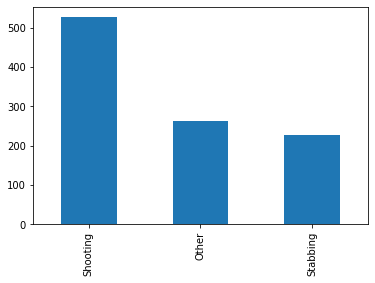

In [21]:
#plot the homicide types and their frequencies on a bar chart
homicide['Homicide_Type'].value_counts().plot.bar()

In [23]:
#find the year with the highest number of shootings
homicide[homicide['Homicide_Type']=='Shooting'].groupby('Occurrence_year')['Homicide_Type'].count().sort_values(ascending=False)

Occurrence_year
2005    53
2018    51
2007    44
2016    41
2017    39
2009    37
2008    37
2012    34
2010    32
2006    29
2011    28
2014    27
2015    26
2004    26
2013    22
Name: Homicide_Type, dtype: int64

In [33]:
#for 2018, list the months with the highest and lowest homicides
#create a column for month

homicide.dtypes


X                  float64
Y                  float64
Index_               int64
Event_Unique_ID     object
Occurrence_year      int64
Division            object
Homicide_Type       object
Occurrence_Date     object
Hood_ID              int64
Neighbourhood       object
Lat                float64
Long               float64
ObjectId             int64
dtype: object

In [47]:
homicide['month'] = pd.DatetimeIndex(homicide['Occurrence_Date']).month

In [48]:
def get_month_name(val):
    months = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
    
    try:
        return months[val-1]
    
    except:
        return val     
    

In [49]:
homicide['month'] = homicide['month'].apply(get_month_name)

In [50]:
homicide.head()

X          Y  Index_ Event_Unique_ID  Occurrence_year Division  \
0 -79.392853  43.685028       1          111878             2004      D53   
1 -79.234962  43.781536       2          125755             2004      D42   
2 -79.206894  43.810860       3          136086             2004      D42   
3 -79.434403  43.670475       4          148623             2004      D13   
4 -79.203865  43.823543       5          148619             2004      D42   

  Homicide_Type           Occurrence_Date  Hood_ID  \
0         Other  2004-01-03T05:00:00.000Z       98   
1      Shooting  2004-01-08T05:00:00.000Z      137   
2      Shooting  2004-01-08T05:00:00.000Z      132   
3      Shooting  2004-01-25T05:00:00.000Z       93   
4      Shooting  2004-01-25T05:00:00.000Z      131   

                              Neighbourhood        Lat       Long  ObjectId  \
0                  Rosedale-Moore Park (98)  43.685028 -79.392853         1   
1                              Woburn (137)  43.781536 -79.234962         2   
2                             Malvern (132)  43.810860 -79.206894         3   
3  Dovercourt-Wallace Emerson-Junction (93)  43.670475 -79.434403         4   
4                               Rouge (131)  43.823543 -79.203865         5   

  month  
0   jan  
1   jan  
2   jan  
3   jan  
4   jan

In [31]:
#list five safest neighborhoods
homicide.groupby('Neighbourhood')['Index_'].count().sort_values()

Neighbourhood
Kingsway South (15)                       1
Yonge-Eglinton (100)                      1
Newtonbrook West (36)                     1
Bayview Woods-Steeles (49)                1
Runnymede-Bloor West Village (89)         2
                                         ..
Rouge (131)                              24
Malvern (132)                            25
Moss Park (73)                           26
Glenfield-Jane Heights (25)              27
Mount Olive-Silverstone-Jamestown (2)    29
Name: Index_, Length: 130, dtype: int64

In [28]:
#which neighborhood had the highest number of stabbings
homicide[homicide['Homicide_Type']=='Stabbing'].groupby('Neighbourhood')['Homicide_Type'].count().sort_values(ascending=False)

Neighbourhood
Downsview-Roding-CFB (26)      8
South Riverdale (70)           7
Thorncliffe Park (55)          5
Woburn (137)                   5
Glenfield-Jane Heights (25)    5
                              ..
Hillcrest Village (48)         1
Highland Creek (134)           1
High Park-Swansea (87)         1
High Park North (88)           1
Agincourt North (129)          1
Name: Homicide_Type, Length: 97, dtype: int64

In [10]:
#(optional)list the homicides by year
#hint - one way to do this is to create new column called year, get the yar from the occurence date,
#then group by your new year column

